In [3]:
import nltk

In [12]:
# implementation of inverted index
#1.1
from pprint import pprint
class inverted_index:

     def __init__(self, name):
        self.name = name 
        self.document_count = 0
        self.dictionary = {}
        self.doc_to_pair = {}
    
     def add_to_index(self, filename):
        document = open(filename, 'r').read()
        words = nltk.word_tokenize(document)
        data_analysis = nltk.FreqDist(words)
        #pprint(data_analysis)
        for k, v in data_analysis.items():
            if k in self.dictionary:
                self.dictionary[k].append((self.document_count,v))
                self.dictionary[k][0] += 1
            else:
                self.dictionary[k] = [1,(self.document_count,v)]
                
        self.doc_to_pair[self.document_count] = (len(words), len(data_analysis))
        self.document_count += 1
        
        #document identifiers to pairs (#tokens, #terms) ?
        
    
        
     def clear(self):
        self.dictionary = {"document_count": 0,}

In [13]:
#testing 1.1
i_index = inverted_index('Random files')
i_index.add_to_index('filename.txt') 
i_index.add_to_index('filename1.txt') 

pprint(i_index.doc_to_pair)
pprint(i_index.dictionary)


{0: (362, 204), 1: (340, 199)}
{'&': [2, (0, 1), (1, 1)],
 ',': [2, (0, 10), (1, 9)],
 '.': [2, (0, 11), (1, 10)],
 '3': [2, (0, 3), (1, 2)],
 ':': [2, (0, 2), (1, 2)],
 '>': [2, (0, 3), (1, 3)],
 'Analytics.': [2, (0, 1), (1, 1)],
 'As': [2, (0, 1), (1, 1)],
 'At': [2, (0, 1), (1, 1)],
 'Autopilot': [2, (0, 1), (1, 1)],
 'BLINDED': [2, (0, 1), (1, 1)],
 'CEO': [2, (0, 1), (1, 1)],
 'Camera': [2, (0, 1), (1, 1)],
 'Controls': [2, (0, 1), (1, 1)],
 'DARK': [2, (0, 1), (1, 1)],
 'DATA': [2, (0, 1), (1, 1)],
 'EYES_CLOSED': [2, (0, 1), (1, 1)],
 'EYES_DOWN': [2, (0, 1), (1, 1)],
 'EYES_NOMINAL': [2, (0, 1), (1, 1)],
 'EYES_UP': [2, (0, 1), (1, 1)],
 'Elon': [2, (0, 1), (1, 1)],
 'For': [2, (0, 1), (1, 1)],
 'GM': [2, (0, 1), (1, 1)],
 'HEAD_DOWN': [2, (0, 1), (1, 1)],
 'HEAD_TRUNC': [2, (0, 1), (1, 1)],
 'Help': [2, (0, 1), (1, 1)],
 'If': [2, (0, 1), (1, 1)],
 'It': [2, (0, 1), (1, 1)],
 'LOOKING_LEFT': [2, (0, 1), (1, 1)],
 'LOOKING_RIGHT': [2, (0, 1), (1, 1)],
 'Model': [2, (0, 3), (1,

[362, 340]


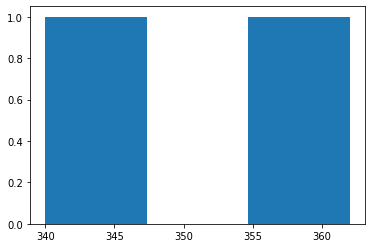

In [10]:
#1.2
#distribution of terms per document?

import matplotlib.pyplot as plt 
x = []
for i in range(i_index.document_count):
    x.append(i_index.doc_to_pair[i][0])
print(x)
#x = [value1, value2, value3] 
plt.hist(x , bins = 3) 
plt.show()
#this shows the distribution of documents in 4 bins based on their total word count

In [11]:
#1.3
import math
"""give string term => t ; returns inverse document frequency"""
def idf(t,i_index):
    df = len(i_index.dictionary[t])-1
    idf = math.log(i_index.document_count / df)
    return idf
idf('When', i_index)
# in this case, as the term occurs in all documents (not much rarity), the idf is 0.

0.6931471805599453

In [166]:
#2
#Boolean model

#In case you are using a standar .py file you can use this to get the query
#import sys
#query = sys.argv[1]
query = input("Insert your query:") 

print('searching for '+ query +' in '+ i_index.name+'...')



aux_vect = query.split(' ')
if(len(aux_vect) == 1):
    result = [a_tuple[0] for a_tuple in i_index.dictionary[query][1:]]
else: # if it is an expression
    result = []
    for i in range(i_index.document_count):
        sq = query.split(' ')
        for j in range(len(sq)):
            #print(sq[j])
            try:
                if sq[j] not in ['&&','||','!'] :
                    doc_vect = [a_tuple[0] for a_tuple in i_index.dictionary[str(sq[j])][1:]]
                    test = i in doc_vect
                    sq[j] = test
            except:
                sq[j] = False
        #list to string query:
        query_done = ' '.join(map(str, sq))
        print("document "+str(i)+": "+query_done)
        qd = query_done.replace('&&', 'and').replace('||', 'or').replace('!', 'not ')
        print(qd)
        if eval(qd):
            result.append(i)

print('Its present in the following documents: '+ str(result))
# equipped && , <<= this is an example query

Insert your query:equipped && ,
searching for equipped && , in Random files...
document 0: True && True
True and True
document 1: False && True
False and True
Its present in the following documents: [0]


In [179]:
#3
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
#Q is the term list
Q = ['driver','equipped',',']

A = {}

for t in Q:
    I_t = i_index.dictionary[t][1:]
    print(I_t)
    idf_t = idf(t,i_index)
    current_doc = [a_tuple[1] for a_tuple in I_t]
    for pair in I_t:
        if pair[0] not in A.keys():
            A[pair[0]] = 0
        A[pair[0]] = A[pair[0]] + pair[1] * idf_t

pprint(A)
            
# this would be more interesting with more files with less similar contents
# but as you can see,given that 'equipped' is only in one of the documents, 
# the document that contains it has a higher similarity, 
# in contrast to the document that has words present in all documents, hence 0

[(0, 2), (1, 2)]
[(0, 1)]
[(0, 10), (1, 9)]
{0: 0.6931471805599453, 1: 0.0}


4) Pen and Paper

Começamos por calcular o IDF para os dez diferentes termos no vocabulário que é usado nos documentos. A cada termo do vocabulário atribuímos também um identificador, o qual irá corresponder a uma dada dimensão nos vectores resultantes da representação vectorial dos documentos:

01: IDF(01) = IDF(shipment) = $\log(4/2)$ = 0.3 

02: IDF(02) = IDF(of) = $\log(4/3)$ = 0.1 

03: IDF(03) = IDF(gold) = $\log(4/1)$ = 0.6 

04: IDF(04) = IDF(damaged) = $\log(4/2)$ = 0.3

05: IDF(05) = IDF(in) = $\log(4/4)$ = 0.0

06: IDF(06) = IDF(fire) = $\log(4/2)$ = 0.3

07: IDF(07) = IDF(delivery) = $\log(4/1)$ = 0.6

08: IDF(08) = IDF(silver) = $\log(4/2)$ = 0.3

09: IDF(09) = IDF(arrived) = $\log(4/2)$ = 0.3

10: IDF(10) = IDF(truck) = $\log(4/3)$ = 0.1

De seguida, cada um dos documentos é representado por um vector com dez dimensões, resultante de multiplicar o TF de cada um dos dez termos no documento, pelo respectivo IDF.

1: $<$ 1 $\times$ IDF(01) , 1 $\times$ IDF(02) , 1 $\times$ IDF(03) , 1 $\times$ IDF(04) , 1 $\times$ IDF(05) , 1 $\times$ IDF(06) , 0 $\times$ IDF(07) , 0 $\times$ IDF(08) , 0 $\times$ IDF(09) , 0 $\times$ IDF(10) $>$



2: $<$ 0 $\times$ IDF(01) , 1 $\times$ IDF(02) , 0 $\times$ IDF(03) , 0 $\times$ IDF(04) , 1 $\times$ IDF(05) , 0 $\times$ IDF(06) , 1 $\times$ IDF(07) , 2 $\times$ IDF(08) , 1 $\times$ IDF(09) , 1 $\times$ IDF(10) $>$


3: $<$ 1 $\times$ IDF(01) , 1 $\times$ IDF(02) , 0 $\times$ IDF(03) , 0 $\times$ IDF(04) , 1 $\times$ IDF(05) , 0 $\times$ IDF(06) , 0 $\times$ IDF(07) , 1 $\times$ IDF(08) , 1 $\times$ IDF(09) , 1 $\times$ IDF(10) $>$


4: $<$ 0 $\times$ IDF(01) , 0 $\times$ IDF(02) , 0 $\times$ IDF(03) , 1 $\times$ IDF(04) , 1 $\times$ IDF(05) , 1 $\times$ IDF(06) , 0 $\times$ IDF(07) , 0 $\times$ IDF(08) , 0 $\times$ IDF(09) , 1 $\times$ IDF(10) $>$


Após os cálculos, ficaríamos com as seguintes representações para os documentos

1: $<$ 0.3 , 0.1 , 0.6 , 0.3 , 0.0 , 0.3 , 0.0 , 0.0 , 0.0 , 0.0 $>$ ~~~~~~~~~~~~ 2: $<$ 0.0 , 0.1 , 0.0 , 0.0 , 0.0 , 0.0 , 0.6 , 0.6 , 0.3 , 0.1 $>$

3: $<$ 0.3 , 0.1 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.3 , 0.3 , 0.1 $>$ ~~~~~~~~~~~~ 4: $<$ 0.0 , 0.0 , 0.0 , 0.3 , 0.0 , 0.3 , 0.0 , 0.0 , 0.0 , 0.1 $>$


A representação vectorial para a consulta seria $<$ 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 0.0 , 1.0 $>$
~\\

O documento mais relevante para a consulta seria assim o número 2, pois seria este o que obteria o maior valor para a semelhança do cosseno entre uma representação para um documento, e a representação para a consulta. 
~\\

Note-se que apenas as dimensões 8 e 10 dos vectores iriam contribuir para o valor da semelhança do cosseno, e note-se que o documento 2 é aquele que apresenta um valor mais alto na dimensão 8. A semelhança do cosseno entre dois vectores $\mathbf{A}$ e $\mathbf{B}$ é calculada de acordo com a seguinte equação:

$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$